# Lab 6: Feature Extraction


Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **5BSc DS A** <br>
Date: 31/10/2023

---------------

## `Objective`:  
1. Upload 10 images from a folder.
1. Apply Feature Extraction methods to find the most similar image in the context of:
    1. *Color*
    1. *Shape*
    1. *Texture*

## `Theory`:  

### Feature Extraction:
Feature extraction is a crucial step in image analytics and computer vision, aiming to transform visual information into a numerical form that can be analyzed and processed by algorithms. The primary goal is to identify and extract significant characteristics from images, facilitating tasks such as image recognition, classification, segmentation, and retrieval. Effective feature extraction captures the essence of the image content while reducing dimensionality, leading to improved performance and efficiency in subsequent analytical tasks.  

<br>

### Different Feature Extraction methods:
1. **Color-Based Features**
    - Color Histograms
    - Color Moments
    - Color Coherence Vectors
<br><br>
1. **Shape-Based Features**
    - Edge Detection
    - Contour Descriptors
    - Region-Based Descriptors
<br><br>
1. **Texture-Based Features**
    - Gray Level Co-occurrence Matrix
    - Local Binary Patterns
    - Gabor Filters
<br><br>
1. **Spatial Layout Features**
    - Histogram of Oriented Gradients
    - Spatial Pyramid Matching
<br><br>
1. **Keypoint-Based Features**
    - SIFT (Scale-Invariant Feature Transform)
    - SURF (Speeded Up Robust Features)
    - ORB (Oriented FAST and Rotated BRIEF)

## `Code`:

In [2]:
# importing all the necessary libraries/modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

**Similarity table on the basis of Colour, Texture (Contrast only) and Shape**

In [4]:
def colorHistogramSimilarity(image1, image2):
    if image1 is None or image2 is None:
        return 0.0  # Handle cases where image loading failed.

    hist1 = cv2.calcHist([image1], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist2 = cv2.calcHist([image2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])    
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

def glcm(image, distance, angle):
    # Convert the image to grayscale if it is not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Initialize the GLCM matrix
    max_value = np.max(image)
    glcm_matrix = np.zeros((max_value + 1, max_value + 1), dtype=int)
    
    rows, cols = image.shape
    for i in range(rows):
        for j in range(cols):
            pixel_value = image[i, j]
            neighbor_row = i + int(distance * np.sin(angle))
            neighbor_col = j + int(distance * np.cos(angle))
            if 0 <= neighbor_row < rows and 0 <= neighbor_col < cols:
                neighbor_value = image[neighbor_row, neighbor_col]
                glcm_matrix[pixel_value, neighbor_value] += 1
    
    # Normalize the GLCM matrix
    glcm_matrix = glcm_matrix / glcm_matrix.sum()
    
    return glcm_matrix

def contrastFeature(glcm):
    contrast = 0.0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            contrast += (i - j) ** 2 * glcm[i, j]
    return contrast

def textureSimilarity(image1, image2):
    if image1 is None or image2 is None:
        return 0.0  # Handle cases where image loading failed.

    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    glcm1 = glcm(gray1, 1, 0)
    glcm2 = glcm(gray2, 1, 0)
    
    contrast1 = contrastFeature(glcm1)
    contrast2 = contrastFeature(glcm2)
    
    return np.abs(contrast1 - contrast2)

def shapeSimilarity(image1, image2):
    if image1 is None or image2 is None:
        return 0.0  # Handle cases where image loading failed.

    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    min_height = min(gray1.shape[0], gray2.shape[0])
    min_width = min(gray1.shape[1], gray2.shape[1])
    gray1 = cv2.resize(gray1, (min_width, min_height))
    gray2 = cv2.resize(gray2, (min_width, min_height))
    
    edges1 = cv2.Canny(gray1, 100, 200)
    edges2 = cv2.Canny(gray2, 100, 200)
    
    diff = cv2.absdiff(edges1, edges2)
    
    return np.mean(diff)    
    
def displaySimilarImages(similarities, folderPath, title):
    # Create a subplot to display images side by side
    plt.figure(figsize=(12, 3))
    
    for i in range(5):
        filename, score = similarities[i]
        image_path = os.path.join(folder_path, filename)
        folder_image = cv2.imread(image_path)
        folder_image = cv2.cvtColor(folder_image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i + 1)
        plt.imshow(cv2.resize(folder_image, (150, 150)))  # Resize images
        score = float(score)  # Convert to a float
        plt.title(f"Score: {score:.4f}")
    
    plt.suptitle(title)
    plt.show()

def compareToFolder(uploadedImagePath, folderPath):
    uploadedImage = cv2.imread(uploadedImagePath)
    if uploadedImage is None:
        print("Error loading the uploaded image.")
        return
    
    similaritiesColor = []
    similaritiesTexture = []
    similaritiesShape = []
    
    for filename in os.listdir(folderPath):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            imagePath = os.path.join(folderPath, filename)
            folderImage = cv2.imread(imagePath)
            
            if folderImage is None:
                continue
            
            # Calculate similarities
            colorSimilarity = colorHistogramSimilarity(uploadedImage, folderImage)
            textureSimilarityVal = textureSimilarity(uploadedImage, folderImage)
            shapeSimilarityVal = shapeSimilarity(uploadedImage, folderImage)
            
            similaritiesColor.append((filename, colorSimilarity))
            similaritiesTexture.append((filename, textureSimilarityVal))
            similaritiesShape.append((filename, shapeSimilarityVal))
    
    # Sort the lists of similarities
    similaritiesColor.sort(key=lambda x: x[1], reverse=True)
    similaritiesTexture.sort(key=lambda x: x[1], reverse=True)
    similaritiesShape.sort(key=lambda x: x[1])
    
    # Convert lists to pandas DataFrames
    dfColor = pd.DataFrame(similaritiesColor, columns=["Filename", "Color Similarity"])
    dfTexture = pd.DataFrame(similaritiesTexture, columns=["Filename", "Texture Similarity"])
    dfShape = pd.DataFrame(similaritiesShape, columns=["Filename", "Shape Similarity"])
    
    # Display DataFrames
    print("Similarity Table - Color:")
    print(dfColor)
    
    print("\nSimilarity Table - Texture:")
    print(dfTexture)
    
    print("\nSimilarity Table - Shape:")
    print(dfShape)
    
    # Display similar images based on color
    displaySimilarImages(similaritiesColor, folderPath, "Similar Images Based on Color")

    # Display similar images based on texture
    displaySimilarImages(similaritiesTexture, folderPath, "Similar Images Based on Texture")

    # Display similar images based on shape
    displaySimilarImages(similaritiesShape, folderPath, "Similar Images Based on Shape")

Similarity Table - Color:
  Filename  Color Similarity
0    1.jpg          1.000000
1    9.jpg          0.777503
2    7.jpg          0.567104
3   2.jpeg          0.409871
4   6.jpeg          0.361308
5    8.jpg          0.332237
6    5.jpg          0.331827
7   10.jpg          0.307593
8    4.jpg          0.171841
9    3.jpg          0.077825

Similarity Table - Texture:
  Filename  Texture Similarity
0   6.jpeg          479.313437
1    9.jpg          243.502386
2    7.jpg          182.513297
3    4.jpg          169.612549
4    8.jpg          128.233142
5    3.jpg           60.310492
6    5.jpg           16.509369
7   10.jpg           16.140192
8   2.jpeg           14.033808
9    1.jpg            0.000000

Similarity Table - Shape:
  Filename  Shape Similarity
0    1.jpg          0.000000
1   10.jpg          9.225285
2    5.jpg         11.984706
3   2.jpeg         12.206292
4    3.jpg         18.965448
5    8.jpg         24.715914
6    9.jpg         26.770814
7    4.jpg         29.7981

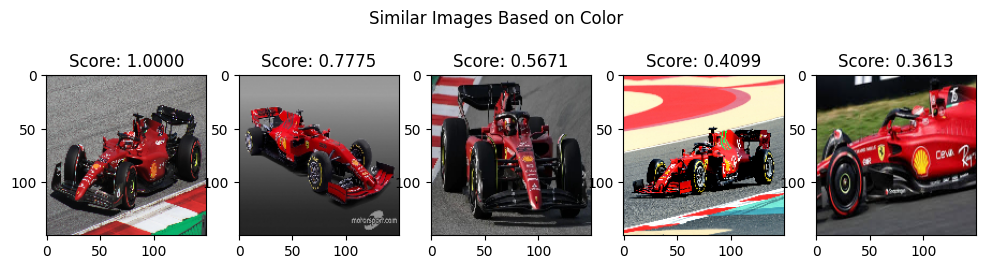

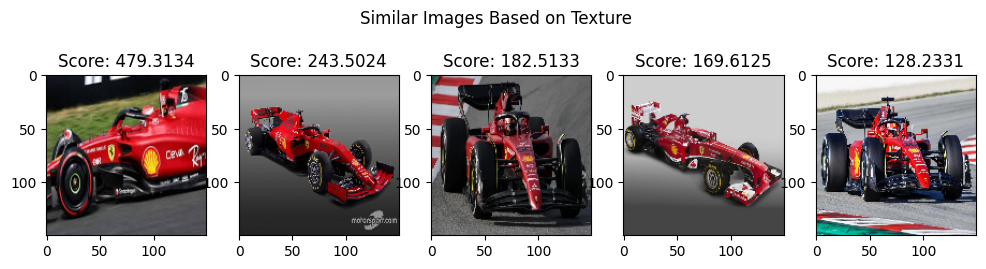

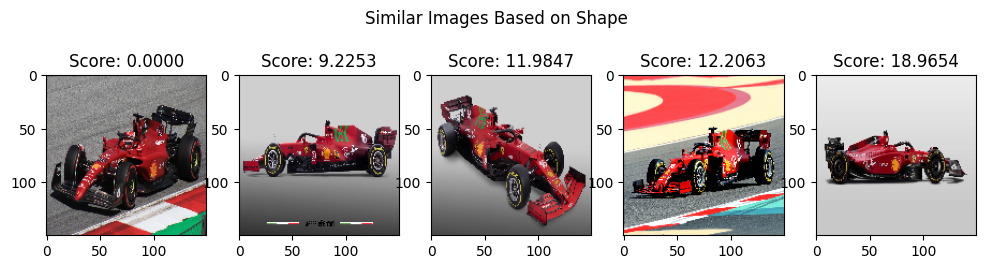

In [6]:
# Recalling the above message
uploaded_image_path = 'D:/Z/Downloads/ferrari cars/1.jpg'
folder_path = 'D:/Z/Downloads/ferrari cars'
compareToFolder(uploaded_image_path, folder_path)

**Similarity table on the basis of Colour, Texture (Contrast, Energy, Homogeneity, Correla) and Shape**

In [11]:
def colorHistogramSimilarity(image1, image2):
    if image1 is None or image2 is None:
        return 0.0  # Handle cases where image loading failed.
    hist1 = cv2.calcHist([image1], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist2 = cv2.calcHist([image2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])    
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

def glcm(image, distance, angle):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    max_value = np.max(image)
    glcm_matrix = np.zeros((max_value + 1, max_value + 1), dtype=int)
    rows, cols = image.shape
    for i in range(rows):
        for j in range(cols):
            pixel_value = image[i, j]
            neighbor_row = i + int(distance * np.sin(np.radians(angle)))
            neighbor_col = j + int(distance * np.cos(np.radians(angle)))
            if 0 <= neighbor_row < rows and 0 <= neighbor_col < cols:
                neighbor_value = image[neighbor_row, neighbor_col]
                glcm_matrix[pixel_value, neighbor_value] += 1
    glcm_matrix = glcm_matrix / glcm_matrix.sum()
    return glcm_matrix

def contrastFeature(glcm):
    contrast = 0.0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            contrast += (i - j) ** 2 * glcm[i, j]
    return contrast

def textureSimilarity(image1, image2):
    if image1 is None or image2 is None:
        return 0.0  # Handle cases where image loading failed.
    glcm1 = glcm(image1, 1, 0)
    glcm2 = glcm(image2, 1, 0)
    contrast1 = contrastFeature(glcm1)
    contrast2 = contrastFeature(glcm2)
    return np.abs(contrast1 - contrast2)

def shapeSimilarity(image1, image2):
    if image1 is None or image2 is None:
        return 0.0  # Handle cases where image loading failed.
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    min_height = min(gray1.shape[0], gray2.shape[0])
    min_width = min(gray1.shape[1], gray2.shape[1])
    gray1 = cv2.resize(gray1, (min_width, min_height))
    gray2 = cv2.resize(gray2, (min_width, min_height))
    edges1 = cv2.Canny(gray1, 100, 200)
    edges2 = cv2.Canny(gray2, 100, 200)
    diff = cv2.absdiff(edges1, edges2)
    return np.mean(diff)

def displaySimilarImages(similarities, folderPath, title):
    num_images_to_display = min(len(similarities), 5)
    plt.figure(figsize=(12, 3))
    for i in range(num_images_to_display):
        filename, score = similarities[i]
        imagePath = os.path.join(folderPath, filename)
        folderImage = cv2.imread(imagePath)
        folderImage = cv2.cvtColor(folderImage, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i + 1)
        plt.imshow(cv2.resize(folderImage, (150, 150)))  # Resize images
        plt.title(f"Score: {score:.4f}")
    plt.suptitle(title)
    plt.show()

def compareToFolder(uploadedImagePath, folderPath):
    uploadedImage = cv2.imread(uploadedImagePath)
    if uploadedImage is None:
        print("Error loading the uploaded image.")
        return
    similaritiesColor = []
    similaritiesTexture = []
    similaritiesShape = []
    for filename in os.listdir(folderPath):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            imagePath = os.path.join(folderPath, filename)
            folderImage = cv2.imread(imagePath)
            if folderImage is None:
                continue
            colorSimilarity = colorHistogramSimilarity(uploadedImage, folderImage)
            textureSimilarityVal = textureSimilarity(uploadedImage, folderImage)
            shapeSimilarityVal = shapeSimilarity(uploadedImage, folderImage)
            similaritiesColor.append((filename, colorSimilarity))
            similaritiesTexture.append((filename, textureSimilarityVal))
            similaritiesShape.append((filename, shapeSimilarityVal))
            
    similaritiesColor.sort(key=lambda x: x[1], reverse=True)
    similaritiesTexture.sort(key=lambda x: x[1], reverse=True)
    similaritiesShape.sort(key=lambda x: x[1])
    uploadedImageRGB = cv2.cvtColor(uploadedImage, cv2.COLOR_BGR2RGB)
    
    plt.imshow(uploadedImageRGB)
    plt.title("Uploaded Image")
    plt.show()
    
    dfColor = pd.DataFrame(similaritiesColor, columns=["Filename", "Color Similarity"])
    dfTexture = pd.DataFrame(similaritiesTexture, columns=["Filename", "Texture Similarity"])
    dfShape = pd.DataFrame(similaritiesShape, columns=["Filename", "Shape Similarity"])
    
    print("Similarity Table - Color:")
    print(dfColor)
    print("\nSimilarity Table - Texture:")
    print(dfTexture)
    print("\nSimilarity Table - Shape:")
    print(dfShape)
    
    displaySimilarImages(similaritiesColor, folderPath, "Similar Images Based on Color")
    displaySimilarImages(similaritiesTexture, folderPath, "Similar Images Based on Texture")
    displaySimilarImages(similaritiesShape, folderPath, "Similar Images Based on Shape")

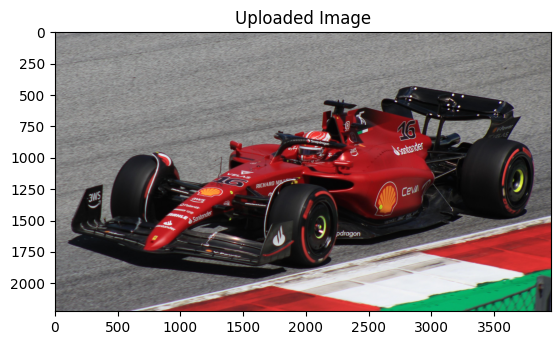

Similarity Table - Color:
  Filename  Color Similarity
0    1.jpg          1.000000
1    9.jpg          0.777503
2    7.jpg          0.567104
3   2.jpeg          0.409871
4   6.jpeg          0.361308
5    8.jpg          0.332237
6    5.jpg          0.331827
7   10.jpg          0.307593
8    4.jpg          0.171841
9    3.jpg          0.077825

Similarity Table - Texture:
  Filename  Texture Similarity
0   6.jpeg          479.313437
1    9.jpg          243.502386
2    7.jpg          182.513297
3    4.jpg          169.612549
4    8.jpg          128.233142
5    3.jpg           60.310492
6    5.jpg           16.509369
7   10.jpg           16.140192
8   2.jpeg           14.033808
9    1.jpg            0.000000

Similarity Table - Shape:
  Filename  Shape Similarity
0    1.jpg          0.000000
1   10.jpg          9.225285
2    5.jpg         11.984706
3   2.jpeg         12.206292
4    3.jpg         18.965448
5    8.jpg         24.715914
6    9.jpg         26.770814
7    4.jpg         29.7981

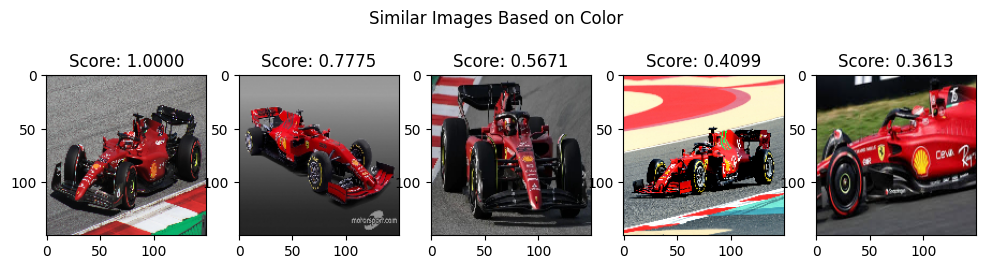

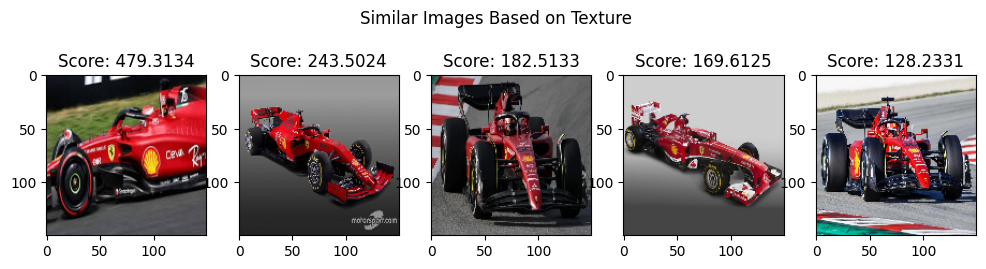

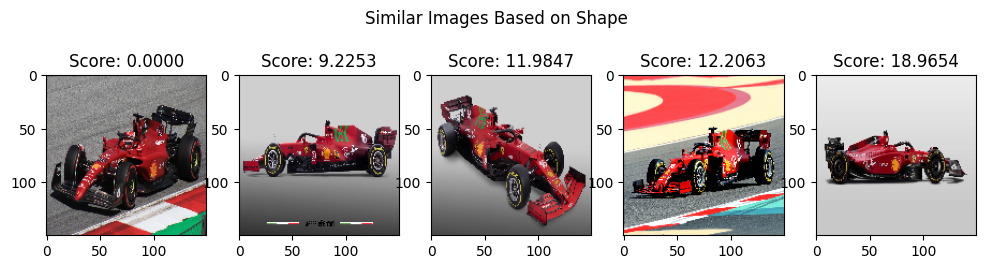

In [12]:
# Example usage
uploaded_image_path = 'D:/Z/Downloads/ferrari cars/1.jpg'
folder_path = 'D:/Z/Downloads/ferrari cars'
compareToFolder(uploaded_image_path, folder_path)

<hr>